In this notebook I hope to explore a dataset on powerlifters. I myself have done a couple powerlifting competitions before and I'm big into lifting in general, so I think it'd be interesting to play around with this data set and maybe see how I'd stack up against the greatest!

The data used in this kernel can be accessed at https://www.kaggle.com/open-powerlifting/powerlifting-database

# Standard Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Data...

In [2]:
lifters = pd.read_csv('powerlifters1.csv')

# Get Insight On Data/Clean Up

In [3]:
print(lifters.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 17 columns):
MeetID            386414 non-null int64
Name              386414 non-null object
Sex               386414 non-null object
Equipment         386414 non-null object
Age               147147 non-null float64
Division          370571 non-null object
BodyweightKg      384012 non-null float64
WeightClassKg     382602 non-null object
Squat4Kg          1243 non-null float64
BestSquatKg       298071 non-null float64
Bench4Kg          1962 non-null float64
BestBenchKg       356364 non-null float64
Deadlift4Kg       2800 non-null float64
BestDeadliftKg    317847 non-null float64
TotalKg           363237 non-null float64
Place             385322 non-null object
Wilks             362194 non-null float64
dtypes: float64(10), int64(1), object(6)
memory usage: 50.1+ MB
None


Wow that's a lot of information! One thing I notice right away is the weight is in Kg. While I get that metric is superior, I'm an American and when I go to the gym I lift with pounds, so the first order of business should be to make some new columns in pounds.

Another thing I notice is that there are not many data points of Squat4kg, Bench4kg, and Deadlift4kg. Let's get rid of those too.

In [4]:
del lifters['Squat4Kg']
del lifters['Bench4Kg']
del lifters['Deadlift4Kg']


lifters['BodyweightLb'] = round((lifters['BodyweightKg'] * 2.20462), 2)
lifters['BestSquatLb'] = round((lifters['BestSquatKg'] * 2.20462), 2)
lifters['BestBenchLb'] = round((lifters['BestBenchKg'] * 2.20462), 2)
lifters['BestDeadliftLb'] = round((lifters['BestDeadliftKg'] * 2.20462), 2)
lifters['TotalLb'] = round((lifters['TotalKg'] * 2.20462), 2) 

The next section is required for converting Weight Class Kg to Lb

In [5]:
# Some Weight Classes have a + sign in it, meaning it is that weight or more (no maximum)
# e.g. 90+ (Weight class for 90kg or more people)
# This means the column will need some extra detail to convert to pounds.

#First, a new column which will say whether the weight class they're in has a maximum

lifters['HasMaxWeight'] = False if '+' in lifters['WeightClassKg'] else True

#Next, remove that pesky + sign

lifters['WeightClassKg'] = lifters['WeightClassKg'].str.replace('+','')

#Almost there...now we need to convert the strings left to floats

lifters['WeightClassKg'] = lifters['WeightClassKg'].astype('float')

#Finally, convert the Kg to Lbs!

lifters['WeightClassLb'] = round((lifters['WeightClassKg'] * 2.20462), 2)

Now let's take a sample of our first 5 competitor entries

In [6]:
print(lifters.head(5))

   MeetID              Name Sex   Equipment   Age     Division  BodyweightKg  \
0       0  Angie Belk Terry   F       Wraps  47.0    Mst 45-49         59.60   
1       0       Dawn Bogart   F  Single-ply  42.0    Mst 40-44         58.51   
2       0       Dawn Bogart   F  Single-ply  42.0  Open Senior         58.51   
3       0       Dawn Bogart   F         Raw  42.0  Open Senior         58.51   
4       0      Destiny Dula   F         Raw  18.0   Teen 18-19         63.68   

   WeightClassKg  BestSquatKg  BestBenchKg      ...        TotalKg  Place  \
0           60.0        47.63        20.41      ...         138.35      1   
1           60.0       142.88        95.25      ...         401.42      1   
2           60.0       142.88        95.25      ...         401.42      1   
3           60.0          NaN        95.25      ...          95.25      1   
4           67.5          NaN        31.75      ...         122.47      1   

    Wilks  BodyweightLb  BestSquatLb  BestBenchLb  BestD

Those are some powerful women! Unfortunately though some of these entries will have to go. NaN is not a real weight!

In [7]:
#Axis 0 are rows, how='any' means if there is a single NaN value, delete the row
lifters = lifters.dropna(axis=0, how='any')

print(lifters.head(5))

   MeetID              Name Sex   Equipment   Age     Division  BodyweightKg  \
0       0  Angie Belk Terry   F       Wraps  47.0    Mst 45-49         59.60   
1       0       Dawn Bogart   F  Single-ply  42.0    Mst 40-44         58.51   
2       0       Dawn Bogart   F  Single-ply  42.0  Open Senior         58.51   
5       0   Courtney Norris   F       Wraps  28.0  Open Senior         62.41   
6       0     Maureen Clary   F         Raw  60.0    Mst 60-64         67.31   

   WeightClassKg  BestSquatKg  BestBenchKg      ...        TotalKg  Place  \
0           60.0        47.63        20.41      ...         138.35      1   
1           60.0       142.88        95.25      ...         401.42      1   
2           60.0       142.88        95.25      ...         401.42      1   
5           67.5       170.10        77.11      ...         392.36      1   
6           67.5       124.74        95.25      ...         383.28      1   

    Wilks  BodyweightLb  BestSquatLb  BestBenchLb  BestD

Now we're ready for some cool graphs and stuff!

# Visualization

In powerlifting, you can get your "total" by adding the 3 main lifts (bench+squat+deadlift). At the time of writing this, I weigh 185 lbs (83.9 kg) and my powerlifting total is 1,035 lbs (469.4 kg). Let's see how I stack up!

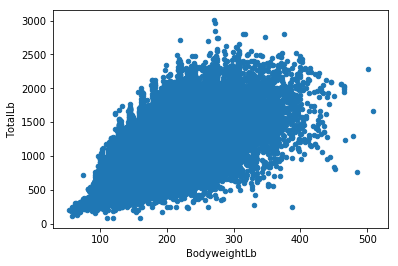

In [8]:
lifters.plot.scatter(x='BodyweightLb', y='TotalLb')

Not too bad! It looks like a 1,035 pound total at 185 pounds bodyweight is right in the middle of the range of totals at my weight. Another thing you can see from this scatter plot is that bodyweight and total weight lifted are correlated (though eventually you get diminishing returns).

Speaking of correlations...let's map out all of our categories and look for more!

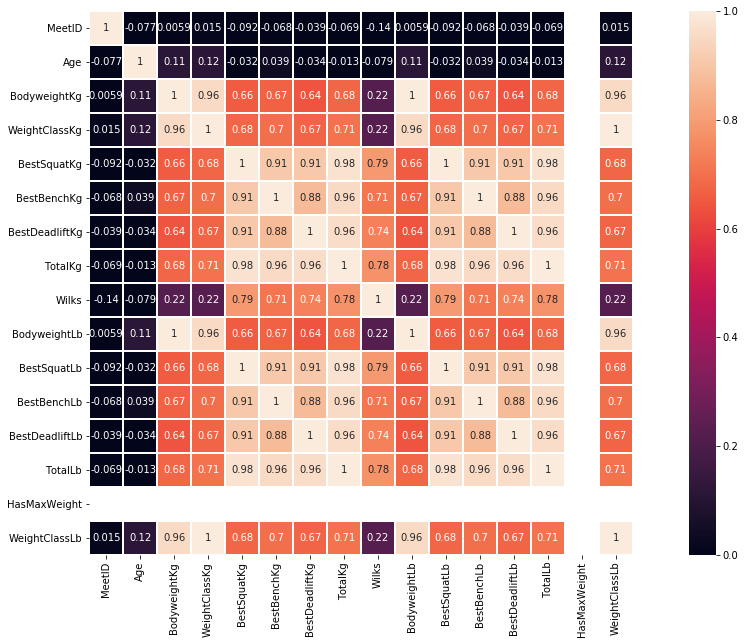

In [9]:
import seaborn as sns

correlations = lifters.corr()

f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlations, vmin=0, vmax=1, annot=True, square=True, linewidths=.5);

First off we see that some things are completely correlated with itself (duh). Secondly, there is a correlation between Lifts in Kg and Lb, which makes sense since a change in one leads to a change in another! Of course you also see that your bodyweight correlates with weight class, another no brainer.

Getting those two things out of the way, we can see some more interesting things...

Age doesn't seem to affect any of the lifts! This was surprising to me, since I thought that being younger (20-30) would mean more weight lifted, but the heatmap here says otherwise!

You'll see that 'Wilks" correlates to the lifts and total, which is to be expected. Wilks is a scoring system which takes into account your weight liftet, bodyweight, and sex.

# Creating A Model

Let's see if we can create an accurate model that can determine a competitor's body weight based off their 3 lifts (and total).

In [10]:
# xgboost is a powerful library which is worth readind up on here: https://xgboost.readthedocs.io/en/latest/

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [25]:
# y = What we want to predict. x = What we'll use to predict

y = lifters['BodyweightLb']
x = lifters[['BestSquatLb','BestDeadliftLb', 'BestBenchLb', 'Sex', 'Age', 'TotalLb']]

# Turn female and males into 0's and 1's respectively
x['Sex'].replace(['F','M'],[0,1],inplace=True)

In [26]:
# Split the data into a training set and a test set

xTrain, xTest, yTrain, yTest = train_test_split(x,y)

# Create and fit model
model = XGBRegressor()

model.fit(xTrain, yTrain)

# Predict with model
predictions = model.predict(xTest)

# Test accuracy
MAE = mean_absolute_error(yTest, predictions)
print("Mean Absolute Error of Model: {}".format(MAE))



Mean Absolute Error of Model: 26.682313104593483


Looks like this model is off by about 27 pounds on average. Let's see if we can fine tune our XGBRegressor a bit more! For this we'll need our handy dandy xgboost documentation for the regressor's parameters found at https://xgboost.readthedocs.io/en/latest/parameter.html

# Improving The Model

In [27]:
newModel = XGBRegressor(n_estimators=500, early_stopping_rounds=5, learning_rate=.2, eval_metric='mae')

newModel.fit(xTrain, yTrain)

# Predict with model
predictions = newModel.predict(xTest)

# Test accuracy
newMAE = mean_absolute_error(yTest, predictions)
print("Mean Absolute Error of Model: {}".format(newMAE))

Mean Absolute Error of Model: 26.408371281984


It is a slightly better score, but to get an idea of how much of a difference we have here we can check.

In [28]:
change = round((((MAE - newMAE)/MAE) * 100), 2)

print("Model improved by {}%".format(change))

Model improved by 1.03%


Not much! Sometimes this happens and can be a sign that either 

1. Your changes to the model weren't very much of an improvement.

2. The model's default parameters worked fine.

I'm going to say it was a combination of 1 and 2.

What do all of our changes mean? How do we even know what to change? 

A lot of the tuning to this model is just trial and error. Playing around with the parameters and comparing each model can show you how this particular model is affected. There is no perfect list of parameters that applies to every dataset. 

I'll give a brief description to each parameter in the new model:

n_estimators - This specicies how many times you go through a cycle. A cycle of extreme gradient boosting (xgboost) looks like this: https://i.imgur.com/e7MIgXk.png If you have too few n_estimators, you'll end up underfitting your data. Too many values means you'll overfit your data, meaning you'll have a great prediction accuracy for your training set, but not your test set. This parameters pairs well with our next one.

early_stopping_rounds - This goes nicely with n_estimators because it is a way of saying "If our score doesn't improve over x amount of iterations, stop iterating." So our model may go up to its 150th cycle and then the next 5 cycles don't improve the score, so the model stops.

learning_rate - Learning rate is the amount of "step size" taken in each update of the cycle. A smaller learning rate generally gives more accurate results (but takes longer).

eval_metric - This is just how the model scores itself so it "knows" what to tune to improve.

# Predicting Single Competitors at a Time

It's cool to see the mean value error of our model, but even cooler would be to take a lifter (like me!), give it the input of variables (deadlift, squat, and bench) and have it predict the weight based off those variables. So let's do exactly that!

In [30]:
# Format is BestSquat, BestDeadlift, BestBench all in pounds, Sex, Age, and Total pounds of weight lifted
# Sex = 1 since I'm a male

# First me!
jLifts = [[345,415,275,1,20,1035]]

jLifts = pd.DataFrame(data=jLifts, 
                      columns=['BestSquatLb','BestDeadliftLb', 'BestBenchLb', 'Sex', 'Age', 'TotalLb'])


jPredict = newModel.predict(jLifts)

print("Predicted Weight: {}".format(jPredict))

Predicted Weight: [180.23074]


Pretty close! It's off by about 5 pounds. Let's look at one more case, a man by the name of Jim Wendler. Jim is a former powerlifter who created the training program '5/3/1' and its many variations, he's an impressive lifter and coach. I've followed his lifting and conditioning principles for a few months now and have seen great results.

Anyways, let's get to his stats. According to this website: https://www.elitefts.com/author/jimwendler/ Jim has a best lift of a 1,000 pound squat, 675 pound bench press, and a 700 pound deadlift for a total of 2,375 pounds. This was done at the 275 pound weight class. I'm not entirely sure on how old he was when he accomplished those lifts, but I'll take a guess and say he was 25 at the time.

In [34]:
# Jim Wendler in his prime (lifts were equipped) You can read the differences between equipped and raw here:
# https://www.wikiwand.com/en/Powerlifting

wLifts = [[1000, 700, 675, 1, 25, 2375]]

wLifts = pd.DataFrame(data=wLifts, 
                      columns=['BestSquatLb','BestDeadliftLb', 'BestBenchLb', 'Sex', 'Age', 'TotalLb'])

wPredict = newModel.predict(wLifts)

print("Predicted Weight: {}".format(wPredict))

Predicted Weight: [252.50146]


Off by 23 pounds this time. But I expected a larger difference in the prediction this time due to the larger weight. 

In conclusion:
Jim's a strong dude!

# Final Thoughts

I'm pretty new to the world of Data Science and Machine Learning, so for every 10 minutes spent coding involves 30 minutes reading and watching videos. This was my first project I did which involved no hand holding (like telling me each line to write/following a format) and I must say it was quite challenging at times! 

Throughout this project my best friends have been the documentation of pandas, sci-kit learn, and xgboost. I only had to use Stack Overflow once (haha) and I probably copy pasted my errors into google at least 36 times. 

I hope to look back at this notebook some day in the future and laugh at how bad my coding practice was and how small my knowledge base was when it comes to this "tough" stuff.

Thanks for reading, and if you're future me, I hope you've gone far!